In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [44]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)
df.to_csv('drug200.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [45]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [46]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [47]:
custom_map = {'drugA':0, 'drugB':1, 'drugC':2, 'drugX':3, 'drugY':4}
df['Drug_Num'] = df['Drug'].map(custom_map)


In [50]:
df.drop('Drug',axis=1).corr()['Drug_Num']

,Drug_Num
Age,-0.004828
Sex,-0.098573
BP,0.372868
Cholesterol,0.055629
Na_to_K,0.589120
Drug_Num,1.000000


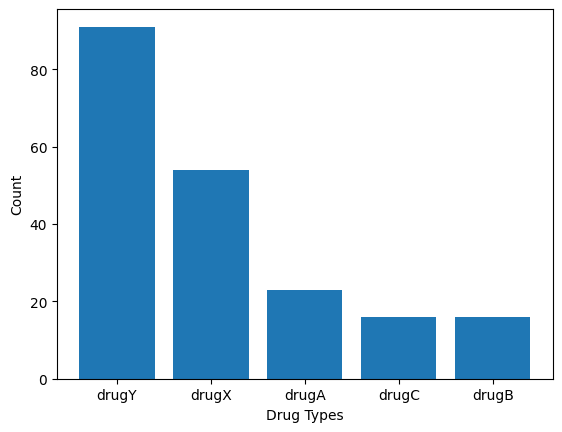

In [61]:
category_count = df['Drug'].value_counts()
category_count
plt.bar(category_count.index, category_count.values)
plt.ylabel('Count')
plt.xlabel('Drug Types')
plt.show()

In [62]:
y = df['Drug']
X = df.drop(['Drug', 'Drug_Num'],axis=1)


(200, 5)

In [66]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size= 0.3, random_state=32)

In [77]:
drugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)
drugTree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [78]:
tree_preds = drugTree.predict(test_X)
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, log_loss
print(f'Accuracy : {np.round(100*accuracy_score(test_y , tree_preds),2)}%')


Accuracy : 98.33%


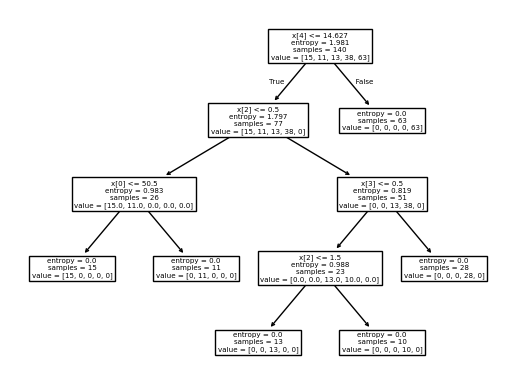

In [79]:
plot_tree(drugTree)
plt.show()

In [81]:
y

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


***THE WHOLE MODEL {Decision Tree}***


Accuracy : 100.0%


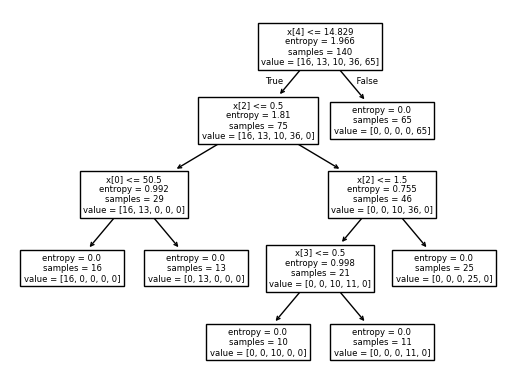

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

def decision_tree_model(df, test_size):
  if(df.isnull().any().any()):
    print("There are some NULL values in the dataset!")
    return -1
  else:
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['BP'] = label_encoder.fit_transform(df['BP'])
    df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
    custom_map = {'drugA':0, 'drugB':1, 'drugC':2, 'drugX':3, 'drugY':4}
    df['Drug_Num'] = df['Drug'].map(custom_map)
    df.drop('Drug',axis=1).corr()['Drug_Num']
    y = df['Drug']
    X = df.drop(['Drug', 'Drug_Num'],axis=1)
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size= test_size, random_state=42)
    drugTree = DecisionTreeClassifier(criterion='entropy',max_depth=8)
    drugTree.fit(train_X, train_y)

    tree_pred = drugTree.predict(test_X)
    print(f'Accuracy : {np.round(100*accuracy_score(test_y, tree_pred),6)}%')
    plot_tree(drugTree)
    plt.show()

df = pd.read_csv('drug200.csv')
decision_tree_model(df, 0.3)